In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()


In [ ]:
iris_data = iris.data
iris_target = iris.target

In [ ]:

iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target],columns=iris['feature_names']+['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### target 0,1,2 -> setosa, versicolor, virginica
### X, y 분리
### X -> (sepal length, sepal width), y(0,1,2)

In [ ]:
iris_df['target']=iris_df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [ ]:
iris_df.loc[:,'target'].value_counts()
iris_df['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [ ]:
# X, y 분리
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, [-1]]
# X = pd.DataFrame(iris_df[['sepal length (cm)','sepal width (cm)']]).values
X = X.iloc[:,[0,1]].values
y = iris_df['target'].map({'setosa':0,'versicolor':1,'virginica':2})
print(X.shape, y.shape)

# 교차검증

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### C: Cost Function -> 값이 크면 훈련을 더 복잡하게 함.(규제 약해짐)
### 값이 작으면 훈련을 느슨하게 함(규제 강해짐)
### random


In [ ]:
param = {'C':[2**0, 2**3, 2**6, 2**9, 2**12],'random_state':[0,7,13,42]}
model = LogisticRegression()
# 교차검증과 하이퍼파리미터 최적화 동시 처리
gs = GridSearchCV(model, param)
gs.fit(X,y)
print(gs.best_estimator_)
print(gs.best_score_)
gs.best_params_
model = gs.best_estimator_
model.fit(X,y)

LogisticRegression(C=8, random_state=0)
0.82


LogisticRegression(C=8, random_state=0)

(1.5, 4.900000000000003)

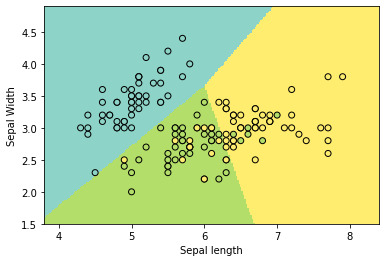

In [ ]:
h=.02
x_min, x_max = X[:,0].min()-.5, X[:,0].max()+.5
y_min, y_max = X[:,1].min()-.5, X[:,1].max()+.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Set3)
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

